# Assignment 02 – Random Forest and Stacking

#### Project Group 7 - Tianqi Zhou - tz232

# Initialization



In [2]:
# import libraries required
import random
import pandas as pd

# set a random seed for the project using the last four digits of uid
random.seed(9334)

## Load the dataset.

In [3]:
# read the dataset
credit_g07 = pd.read_csv('creditcard.csv',header=0)


## Show first 6 data points using head().

In [4]:
# show the first records using .head()
credit_g07.head(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


## Describe pandas Dataframe by using describe.

In [5]:
# use .describe() to get the stastics of the dataset
credit_g07.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Show correlation heat plot of the entire dataset using matplotlib and sns, choose any color pallet (except blue) you like (experiment). 

[Text(0.5, 0, 'Time'),
 Text(1.5, 0, 'V1'),
 Text(2.5, 0, 'V2'),
 Text(3.5, 0, 'V3'),
 Text(4.5, 0, 'V4'),
 Text(5.5, 0, 'V5'),
 Text(6.5, 0, 'V6'),
 Text(7.5, 0, 'V7'),
 Text(8.5, 0, 'V8'),
 Text(9.5, 0, 'V9'),
 Text(10.5, 0, 'V10'),
 Text(11.5, 0, 'V11'),
 Text(12.5, 0, 'V12'),
 Text(13.5, 0, 'V13'),
 Text(14.5, 0, 'V14'),
 Text(15.5, 0, 'V15'),
 Text(16.5, 0, 'V16'),
 Text(17.5, 0, 'V17'),
 Text(18.5, 0, 'V18'),
 Text(19.5, 0, 'V19'),
 Text(20.5, 0, 'V20'),
 Text(21.5, 0, 'V21'),
 Text(22.5, 0, 'V22'),
 Text(23.5, 0, 'V23'),
 Text(24.5, 0, 'V24'),
 Text(25.5, 0, 'V25'),
 Text(26.5, 0, 'V26'),
 Text(27.5, 0, 'V27'),
 Text(28.5, 0, 'V28'),
 Text(29.5, 0, 'Amount'),
 Text(30.5, 0, 'Class')]

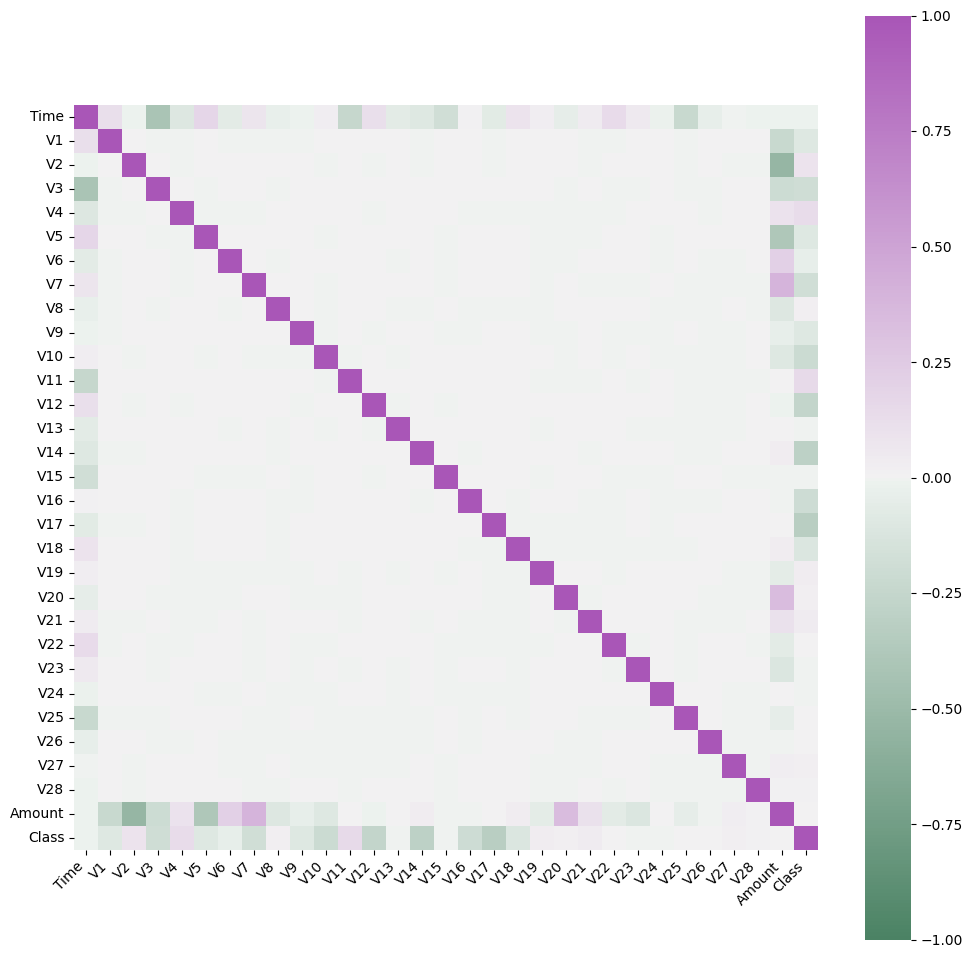

In [6]:
from matplotlib import rcParams
import seaborn as sns

# change the default setting of the figure using rcParams
rcParams["figure.figsize"] = 12, 12
rcParams["figure.dpi"] = 100

# calculate the correlation of the variables
corr = credit_g07.corr()

# create the heatmap
ax = sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
    square=True,
)
# add tick labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")


## Show the Scatterplot matrix for the dataframe (avoid matplotlib and sns for this assignment). You can use Scatterplot Matrix Plotly. Use the code for the second image that shows different colors for classes. In this case, you will get two colors since we have two classes. Also, experiment with visual aspects of the image (not a lot, but an excellent visual will always leave a better impression. you can change color, thickness, font, font size, font color, etc.). No need to explain the plots but do save them in a pdf/svg/png with either static export function or html export function from plotly Interactive HTML Export Plotly.

In [21]:
import plotly.express as px
import pandas as pd

# define the color labels
colors = {0: '0', 1: '1'}
# Create a scatterplot matrix
fig = px.scatter_matrix(credit_g07, 
                        dimensions=credit_g07.columns[:-1],  # Exclude the 'Class' column
                        color=credit_g07['Class'].map(colors),
                        color_discrete_sequence=["#93C572", "purple"],  # Set the color scale
                        title="Scatterplot Matrix with Color Palette",
                        labels={col: col for col in credit_g07.columns[:-1]})

# update the layout to hide diagonal plots and make the marker smaller
fig.update_traces(diagonal_visible=False,marker=dict(size=3))

# change the figure size to make it clearer
fig.update_layout(
    width=2000,
    height=2000,
)
# save the figure as an interactive html
fig.write_html("scatter_matrix.html")

## Split the dataset into the Training set and Test set. Choose your preferred split and justify the rationale. 

In [7]:
from sklearn.model_selection import train_test_split

# remove the time variable that is irrelevant to our problem
credit_g07 = credit_g07.iloc[:, 1:]

# initialize the independent variable X and dependent variable Y
X_credit_g07 = credit_g07.loc[:, credit_g07.columns != "Class"].to_numpy()
y_credit_g07 = credit_g07.iloc[:, -1:].to_numpy()

# split the dataset into training and testing set (70/30)
X_train_g07, X_test_g07, y_train_g07, y_test_g07 = train_test_split(
    X_credit_g07, y_credit_g07, test_size=0.30, random_state=0
)

Answer: Here I used a 70-30 training-test split because in this way, we could get sufficient training data for the model to learn the pattern, and we also have adequate testing data to evaluate the model performance.

## Perform classification routine by using LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), SVC(), GaussianNB(), RandomForestClassifier(), BaggingClassifier(), GradientBoostingClassifier(), XGboostclassifier. Output the accuracy box plot as we have seen in the class (make sure to change regressmod df to classmod. And use an appropriate metric for classification evaluation, for example, accuracy, precision,recall etc). Remember to use the object oriented approach and develop a function (def...), this will be very helpful for the next assignment.

In [13]:
X_train_g07_trial = X_train_g07[0:20000]
y_train_g07_trial = y_train_g07[0:20000]

In [14]:
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier

# define a function for base models we're going to train
def base_models():
  models = dict()
  models["lg"] = LogisticRegression()
  models["KNN"] = KNeighborsClassifier()
  models["Tree"] = DecisionTreeClassifier()
  models["svc"] = SVC()
  models["NB"] = GaussianNB()
  models["Random Forest"] = RandomForestClassifier()
  models["Bagging"] = BaggingClassifier()
  models["GBM"] = GradientBoostingClassifier()
  models["XGB"] = XGBClassifier()
  return models


# define a function to evaluate the list of models using cross validation
def eval_models(model):
  # perform ten fold cross validation
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  # use accuracy to evaluate the performance of our classification models
  scores = cross_val_score(model, X_train_g07_trial, y_train_g07_trial, scoring='accuracy', cv=cv, n_jobs=-1, 
                            error_score='raise')
  return scores

In [15]:
import numpy as np
models_g07 = base_models()

# set lists for the results and model names
results_g07, names_g07 = list(), list() 

for name, model in models_g07.items():
  scores = eval_models(model)
  results_g07.append(scores)
  names_g07.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))


classifier_g07 = pd.DataFrame(np.transpose(results_g07), columns = ["lg","KNN","Tree","svc","NB","Random Forest","Bagging","GBM", "XGB"])
classifier_g07 = pd.melt(classifier_g07.reset_index(), id_vars='index',value_vars=["lg","KNN","Tree","svc","NB","Random Forest","Bagging","GBM", "XGB"])


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = px.box(classifier_g07, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": " Accuracy"
        },title="Model Performance")
fig.show()

>lg 0.999 (0.001)
>KNN 0.999 (0.001)
>Tree 0.999 (0.001)
>svc 0.998 (0.001)
>NB 0.978 (0.003)
>Random Forest 0.999 (0.001)
>Bagging 0.999 (0.001)
>GBM 0.999 (0.001)
>XGB 0.999 (0.001)


## Select the best classifier for level o classifier. Use logistic regression as a second level classifier. Similar to 5 generate the box plot and show the accuracy of each algorithm as well as stacked classifier. Also show the confusion metrices of the above algorithms .

In [17]:
# the best model is XGBoosting classifier
from sklearn.ensemble import StackingClassifier
def get_stacking():
	# define the base models
  level0 = list()
  level0.append(('XGB', XGBClassifier()))

	# define second level model
  level1 = LogisticRegression()

	# define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model


# define a function for base models we're going to train
def base_models():
  models = dict()
  models["lg"] = LogisticRegression()
  models["XGB"] = XGBClassifier()
  models["Stacked Model"] = get_stacking()
  return models


# define a function to evaluate the list of models using cross validation
def eval_models(model):
  # perform ten fold cross validation
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  # use accuracy to evaluate the performance of our classification models
  scores = cross_val_score(model, X_train_g07_trial, y_train_g07_trial, scoring='accuracy', cv=cv, n_jobs=-1, 
                            error_score='raise')
  return scores

models_g07 = base_models()

# set lists for the results and model names
results_g07, names_g07 = list(), list() 

for name, model in models_g07.items():
  scores = eval_models(model)
  results_g07.append(scores)
  names_g07.append(name)
  print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))


classifier_g07 = pd.DataFrame(np.transpose(results_g07), columns = ["lg", "XGB","stacked model"])
classifier_g07 = pd.melt(classifier_g07.reset_index(), id_vars='index',value_vars=["lg", "XGB","stacked model"])


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

fig = px.box(classifier_g07, x="variable", y="value",color="variable",points='all',
labels={"variable": "Machine Learning Model",
        "value": " Accuracy"
        },title="Model Performance")
fig.show()

>lg 0.999 (0.001)
>XGB 0.999 (0.001)
>Stacked Model 0.999 (0.001)
